In [12]:
# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load the Movie Dataset
data = pd.read_csv("/content/movies.csv")

# Step 3: Select Relevant Columns (Features & Target)
features = ['budget', 'popularity', 'vote_average', 'vote_count', 'runtime']
target = 'revenue'  # Predicting revenue-based success

# Drop rows with missing target values
data.dropna(subset=[target], inplace=True)

# Step 4: Convert Revenue into a Binary Classification (Hit/Flop)
median_revenue = data['revenue'].median()
data['success'] = (data['revenue'] >= median_revenue).astype(int)  # 1 = Hit, 0 = Flop

# Step 5: Handle Missing Values in Features
data.fillna(data[features].mean(), inplace=True)

# Step 6: Define Features (X) & Target (y)
X = data[features]  # Selected numerical features
y = data['success']  # Target: Hit (1) or Flop (0)

# Step 7: Scale the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 8: Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 9: Train Machine Learning Model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Using Random Forest
model.fit(X_train, y_train)

# Step 10: Make Predictions
y_pred = model.predict(X_test)

# Step 11: Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 12: Make Predictions for a New Movie
new_movie = np.array([[100000000, 7.5, 8.0, 1500, 120]])  # budget, popularity, vote_average, vote_count, runtime

# Convert new_movie to DataFrame with correct column names
new_movie_df = pd.DataFrame(new_movie, columns=features)

# Scale the new movie data
new_movie_scaled = scaler.transform(new_movie_df)

# Predict
prediction = model.predict(new_movie_scaled)
print("Predicted Success for New Movie:", "Hit" if prediction[0] == 1 else "Flop")


Model Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       491
           1       0.84      0.88      0.86       470

    accuracy                           0.86       961
   macro avg       0.86      0.86      0.86       961
weighted avg       0.86      0.86      0.86       961

Predicted Success for New Movie: Hit


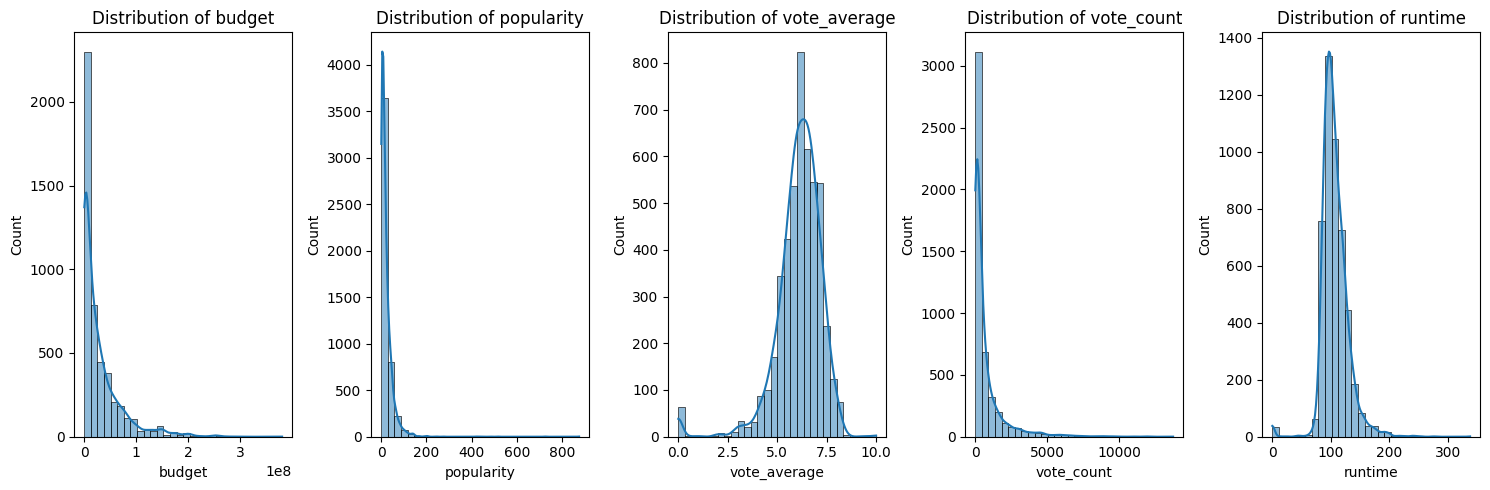

Model Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       491
           1       0.84      0.88      0.86       470

    accuracy                           0.86       961
   macro avg       0.86      0.86      0.86       961
weighted avg       0.86      0.86      0.86       961



<ipython-input-14-0779f403f83d>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


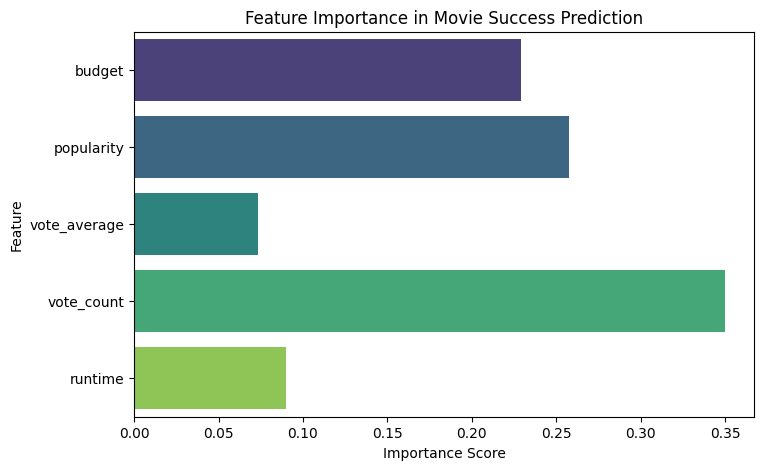

Predicted Success for New Movie: Hit


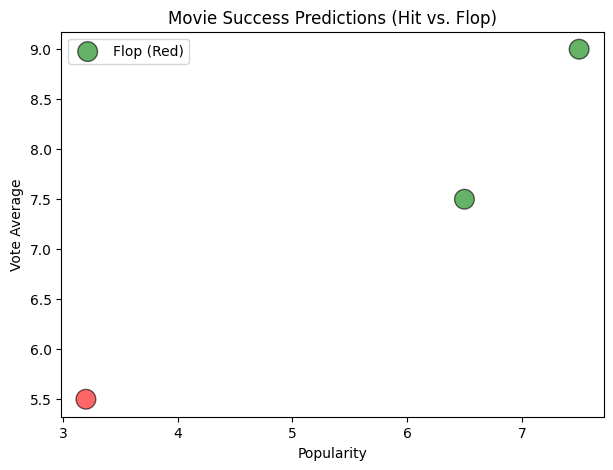

In [14]:
# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load the Movie Dataset
data = pd.read_csv("/content/movies.csv")

# Step 3: Select Relevant Columns (Features & Target)
features = ['budget', 'popularity', 'vote_average', 'vote_count', 'runtime']
target = 'revenue'  # Predicting revenue-based success

# Drop rows with missing target values
data.dropna(subset=[target], inplace=True)

# Step 4: Convert Revenue into a Binary Classification (Hit/Flop)
median_revenue = data['revenue'].median()
data['success'] = (data['revenue'] >= median_revenue).astype(int)  # 1 = Hit, 0 = Flop

# Step 5: Handle Missing Values in Features
data.fillna(data[features].mean(), inplace=True)

# Step 6: Visualizing Feature Distributions
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 5, i + 1)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

# Step 7: Define Features (X) & Target (y)
X = data[features]  # Selected numerical features
y = data['success']  # Target: Hit (1) or Flop (0)

# Step 8: Scale the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 9: Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 10: Train Machine Learning Model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Using Random Forest
model.fit(X_train, y_train)

# Step 11: Make Predictions
y_pred = model.predict(X_test)

# Step 12: Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 13: Feature Importance Visualization
importances = model.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features, palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Movie Success Prediction")
plt.show()

# Step 14: Predict a New Movie's Success
new_movie = np.array([[100000000, 7.5, 8.0, 1500, 120]])  # budget, popularity, vote_average, vote_count, runtime
new_movie_df = pd.DataFrame(new_movie, columns=features)
new_movie_scaled = scaler.transform(new_movie_df)
prediction = model.predict(new_movie_scaled)
print("Predicted Success for New Movie:", "Hit" if prediction[0] == 1 else "Flop")

# Step 15: Visualizing Predictions for Multiple Sample Movies
sample_movies = np.array([
    [100000000, 7.5, 9.0, 1500, 120],  # Expected Hit
    [5000000, 3.2, 5.5, 200, 90],      # Expected Flop
    [50000000, 6.5, 7.5, 800, 110],    # Borderline case
])

sample_movies_df = pd.DataFrame(sample_movies, columns=features)
sample_movies_scaled = scaler.transform(sample_movies_df)
predictions = model.predict(sample_movies_scaled)

# Scatter Plot of Predictions
plt.figure(figsize=(7, 5))
colors = ['red' if p == 0 else 'green' for p in predictions]
plt.scatter(sample_movies[:, 1], sample_movies[:, 2], c=colors, s=200, edgecolors='k', alpha=0.6)
plt.xlabel("Popularity")
plt.ylabel("Vote Average")
plt.title("Movie Success Predictions (Hit vs. Flop)")
plt.legend(["Flop (Red)", "Hit (Green)"])
plt.show()


In [16]:
print(data.head())

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

In [17]:
print(data.columns)


Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'success'],
      dtype='object')
